In [1]:
# import model and everything needed to run it
from pytorch_lightning.loggers import TensorBoardLogger
from pytorch_lightning import Trainer
import rbm_torch.analysis.analysis_methods as am
from rbm_torch.utils import utils

import os
import numpy as np
from copy import deepcopy
from rbm_torch.models.pool_crbm_relu_base import pool_CRBM_relu
from rbm_torch.utils.utils import load_run

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Ari

In [2]:
# load data from preconfigured run file
run_file = "./run_files/toy_relu_pcrbm.json"
run_data, base_config = load_run(run_file)

base_config["model_name"] = run_data["model_name"]
base_config["gpus"] = run_data["gpus"]

model_type = run_data["model_type"]
assert model_type == "pool_crbm_relu"

server_model_dir = run_data["server_model_dir"]
base_config['seed'] = 69

In [3]:
checkp, version_dir = am.get_checkpoint_path(base_config["model_name"], rbmdir="./trained_crbms/")

# load crbm
ncrbm = pool_CRBM_relu.load_from_checkpoint(checkp)
ncrbm.eval()

# generate weights inside the latest version directory
utils.all_weights(ncrbm, name=version_dir + base_config["model_name"] + "ordered", order_weights=True)

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

In [5]:
# Directory of Stored CRBMs
# mdir = "/mnt/D1/globus/cov_trained_crbms/"
mdir = "/home/jonah/PycharmProjects/phage_display_ML/datasets/cov/trained_crbms/"
# Which crbms are we looking at
rounds = ["toy_ss"]
# data keys (fasta files we are using to assess model performance)
data_keys = ["toy_ss"]

In [6]:
import json
all_data = am.fetch_data(data_keys, dir="./", assignment_function=None, threads=12)
with open(version_dir + "dataset_indices.json", "r") as json_file:
    di = json.load(json_file)

train_inds = di["train_indices"]
test_inds = di["test_indices"]

new_rounds = np.full((all_data.index.__len__()), "valid")
new_rounds[train_inds] = "train"
new_rounds[test_inds] = "testy"

all_data["round"] = new_rounds.tolist()

Process Time 0.004821062088012695


In [87]:
am.generate_likelihoods(["train", "valid", "testy"], ncrbm, all_data, f"toy_ss_relu")

In [88]:
from copy import copy

ncrbm_likelihoods = am.get_likelihoods("./generated/toy_ss_relu.json")

train_data = copy(all_data[all_data["round"] == "train"])
val_data = copy(all_data[all_data["round"] == "valid"])
test_data = copy(all_data[all_data["round"] == "testy"])

train_data["likelihood"] = ncrbm_likelihoods["likelihoods"]["train"]
val_data["likelihood"] = ncrbm_likelihoods["likelihoods"]["valid"]
test_data["likelihood"] = ncrbm_likelihoods["likelihoods"]["testy"]

/home/jonah/PycharmProjects/phage_display_ML/src/rbm_torch/analysis/analysis_methods.py:223: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  z = sns.kdeplot(likeli[y], shade=False, alpha=0.5, color=colors[yid], ax=axs, label=labels[xid][yid], cumulative=cdf)
/home/jonah/PycharmProjects/phage_display_ML/src/rbm_torch/analysis/analysis_methods.py:223: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  z = sns.kdeplot(likeli[y], shade=False, alpha=0.5, color=colors[yid], ax=axs, label=labels[xid][yid], cumulative=cdf)
/home/jonah/PycharmProjects/phage_display_ML/src/rbm_torch/analysis/analysis_methods.py:223: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  z = sns.kdeplot(likeli[y], shade=False, alpha=0.5

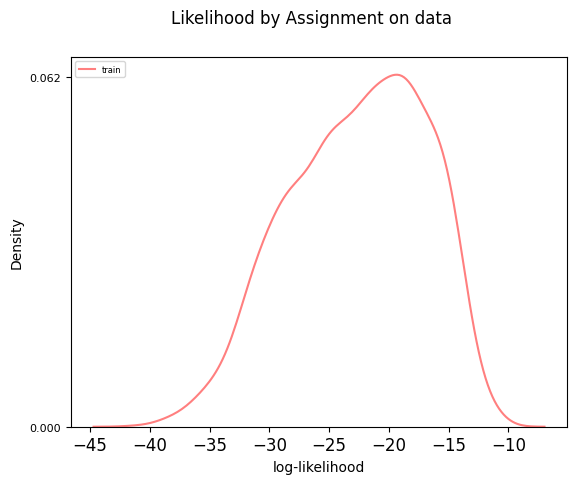

In [89]:
rs_list = [["train"], ["valid"], ["testy"]]
rs_list_t = [list(x) for x in zip(*rs_list)]

dataframe = all_data
likelihood_dict = {}

r_t = train_data
r_v = val_data
r_te = test_data

likelihood_dict[f"train"] = r_t.loc[:, f"likelihood"].tolist()
likelihood_dict[f"valid"] = r_v.loc[:, f"likelihood"].tolist()
likelihood_dict[f"testy"] = r_te.loc[:, f"likelihood"].tolist()

am.plot_likelihoods_multiple(ncrbm_likelihoods["likelihoods"], rs_list_t, rs_list_t, title=f"Likelihood by Assignment on data", xlim=None, legend_font_size=6)

In [78]:
all_data.head()

,sequence,copy_num,round,assignment
0,CCGCCGCGTCGATGCGGCG-------,0.0,train,N/A
1,GGCGTGCGTCCGGTCGCACG------,0.0,train,N/A
2,TCGCCCGTTGCCTCGGGCG-------,0.0,train,N/A
3,TTACACGTCCGCGAAAACGGACG---,0.0,train,N/A
4,CACGTGCGTATTGGCGCACG------,0.0,train,N/A


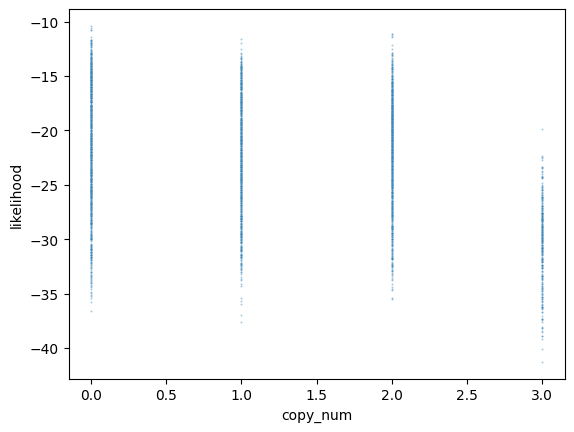

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 1, sharey=True)
sns.scatterplot(data=train_data, x="copy_num", y="likelihood", ax=axs, alpha=0.4, s=2.0)
plt.show()

In [43]:
import torch
import pandas as pd
from rbm_torch.utils.utils import get_beta_and_W
from rbm_torch.utils.seq_utils import cat_to_one_hot

def dataframe_to_input_crbm(dataframe, base_to_id, v_num, q, weights=False):
    seqs = dataframe["sequence"].tolist()
    oh_ten = torch.zeros((len(seqs), v_num, q), dtype=torch.long)
    for iid, seq in enumerate(seqs):
        for n, base in enumerate(seq):
            oh_ten[iid, n, base_to_id[base]] = 1
    if weights:
        weights = dataframe["copy_num"].tolist()
        return oh_ten, weights
    else:
        return oh_ten


def prepare_input_vector(crbm, dataframe, reduction="sum", order_input=True):
    """Transforms a pandas dataframe of sequences into the hidden unit input for a given crbm

    Returns
    -------
    inputs: np.ndarray
        the vector of reduced hidden unit inputs
    layer_map: list
        list that says which layer each reduced hidden unit input belongs to
    hidden_map: list
        list that says which hidden unit each reduced hidden unit input belongs to


    Parameters
    ----------
    crbm: pytorch_lightning.module()
        The convolutional rbm model that you want the hidden unit input for
    dataframe: pandas.DataFrame
        Contains the sequence info to get the hidden unit inputs for
    reduction: default='sum'
        reduction of the extra dimension of the hidden units, can be {sum, mean, extrema}
    order_input:
        Orders the input according from top activating weights to least activating weights of the model

        """
    if type(dataframe) == pd.DataFrame:
        base_to_id = am.int_to_letter_dicts[crbm.molecule]
        data_tensor = dataframe_to_input_crbm(dataframe, base_to_id, crbm.v_num, crbm.q, weights=False)
    elif type(dataframe) == torch.Tensor:
        data_tensor = dataframe
#     input_hiddens = crbm.compute_output_v_for_h(data_tensor) # List of Iuk matrices
    input_hiddens = crbm.compute_output_v(data_tensor) # List of Iuk matrices


    Ih = torch.cat(input_hiddens, dim=1)

    return Ih

In [18]:
def cluster_inputs(I, hidden_unit_2d_combo, padding=0.05, size_to=None, hue_to=None,
                   size_label=None, hue_label=None, ax=None, a=0.7, size_norm=None, hue_norm=None, palette="Set2"):

    # mean = RBM.mean_h(torch.repeat_interleave(I_range.unsqueeze(1), RBM.h_num, dim=1))

    [hidden1, hidden2] = hidden_unit_2d_combo

    if type(I) is torch.tensor:
        I = I.detach().numpy()

    xlab = r'Input $I_{%s}$'%hidden1
    ylab = r'Input $I_{%s}$'%hidden2

    Ih1 = I[:, hidden1]
    Ih2 = I[:, hidden2]

    sns.color_palette(palette, as_cmap=True)
    marker_size = 10

    if size_to is not None and hue_to is None:
        dataset = pd.DataFrame({"input1": Ih1, "input2": Ih2, size_label: size_to})
        g = sns.scatterplot(data=dataset, x="input1", y="input2", size=size_label, palette=palette, alpha=a, s=marker_size, ax=ax, hue_norm=hue_norm, size_norm=size_norm)
    elif size_to is None and hue_to is not None:
        dataset = pd.DataFrame({"input1": Ih1, "input2": Ih2, hue_label: hue_to})
        g = sns.scatterplot(data=dataset, x="input1", y="input2", hue=hue_label, palette=palette, alpha=a, s=marker_size, ax=ax, hue_norm=hue_norm, size_norm=size_norm)
    elif size_to is not None and hue_to is not None:
        dataset = pd.DataFrame({"input1": Ih1, "input2": Ih2, size_label: size_to, hue_label: hue_to})
        g = sns.scatterplot(data=dataset, x="input1", y="input2", size=size_label, palette=palette, hue=hue_label, alpha=a, s=marker_size, ax=ax, hue_norm=hue_norm, size_norm=size_norm)
    else:
        dataset = pd.DataFrame({"input1": Ih1, "input2": Ih2})
        g = sns.scatterplot(data=dataset, x="input1", y="input2", alpha=a, palette=palette, s=marker_size, ax=ax, hue_norm=hue_norm, size_norm=size_norm)

    g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    g.set_xlim([Ih1.min()-padding, Ih1.max()+padding])
    g.set_ylim([Ih2.min()-padding, Ih2.max()+padding])
    g.set_xlabel(xlab)
    g.set_ylabel(ylab)

    # How to make Legend if needed
    # leg = g.axes.flat[0].get_legend()
    # new_title = 'Inputs'
    # leg.set_title(new_title)
    # new_labels = ['label 1', 'label 2']
    # for t, l in zip(leg.texts, new_labels):
    #     t.set_text(l)

    if ax is None:
        plt.show()

import numpy as np
import rbm_torch.utils.utils as utils

def view_weights_crbm_ax(crbm, hidden_key, weight_number, ax=None, sort="top", molecule="protein", title=None, view="full"):
    beta, W = utils.get_beta_and_W(crbm, hidden_key=hidden_key)
    order = np.argsort(beta)[::-1]
    assert sort in ["top", "unordered"]
    assert molecule in ["protein", "dna", "rna"]
    if sort == "top":
        W = W[order]
        selected_weights = W[weight_number]

    elif sort == "unordered":
        selected_weights = W[weight_number]

    if view == "positive":
        selected_weights = np.maximum(selected_weights, 0.)
    elif view == "negative":
        selected_weights = np.minimum(selected_weights, 0.)

    # Assume we want weights
    fig = utils.Sequence_logo(selected_weights, ax=ax, data_type="weights", title=title, molecule=molecule, ticks_every=5)

In [97]:
it = prepare_input_vector(ncrbm, all_data, order_input=True)
beta, W = get_beta_and_W(ncrbm, hidden_key="hidden_10")
order = np.argsort(beta)[::-1]

In [45]:
it.shape

torch.Size([3170, 6])

/tmp/ipykernel_36444/534321928.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  cluster_inputs(torch.tensor(data), input_positions, size_to=fold, hue_label="fold", hue_to=fold,


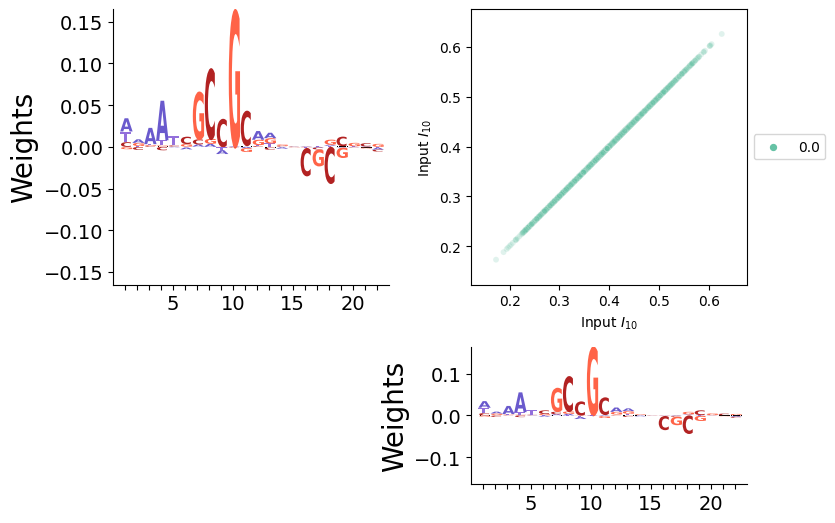

In [102]:
dataframe = all_data
# input_data = torch.flip(it, dims=(0,)).detach()
input_data = it.detach()
crbm = ncrbm
hidden_key = "hidden_10"
input_positions = [10, 10]

mapp = dataframe["copy_num"] == 0.0 #& ((dataframe["segment"] == 1) | (dataframe["segment"] == 4)))
data = input_data[mapp]
fold = dataframe[mapp]["copy_num"].tolist()

fig, axs = plt.subplots(2, 2, gridspec_kw={'width_ratios': [1, 1], 'height_ratios': [2, 1]})

axs[1][0].axis("off")
view_weights_crbm_ax(crbm, hidden_key, input_positions[0], sort="top", ax=axs[1][1], molecule="dna", view="full")
view_weights_crbm_ax(crbm, hidden_key, input_positions[1], sort="top", ax=axs[0][0], molecule="dna", view="full")

cluster_inputs(torch.tensor(data), input_positions, size_to=fold, hue_label="fold", hue_to=fold,
                 size_label="fold", size_norm=(0, 5), a=0.2, ax=axs[0][1])

fig.subplots_adjust(wspace=0.30, hspace=0.30, left=0.00, right=0.99, top=0.99, bottom=0.0)
plt.show()

In [75]:
low0 = all_data[it[:, 0].detach().numpy() < 0.4]

In [82]:
low0.head(100)

,sequence,copy_num,round,assignment
3,TTACACGTCCGCGAAAACGGACG---,0.0,train,N/A
25,TCTTTCGGCCGACCAAACGGCCG---,0.0,train,N/A
26,GTTTGCATGGGGGCAAAC--------,0.0,train,N/A
28,GTAATCGCCCGAGACGACGGGCG---,0.0,train,N/A
30,AGCCATGCGTGCGCCATAACGCACG-,0.0,train,N/A
...,...,...,...,...
506,CGTCGCAATTCAGCGACG--------,0.0,train,N/A
513,AGATCCAGTTGCGAAAGGACGCAAC-,0.0,train,N/A
516,CATCAAAGCGCCGCGGAAATGCGGCG,0.0,train,N/A
524,CGATGATCGCCGCTTAGTTGCGGCG-,0.0,train,N/A


In [8]:
from rbm_torch.utils import seq_utils as su
import pandas as pd

def generate_seqs(crbm):
    gseqs, ghiddens = utils.gen_data_lowT(crbm, beta=2, which = 'marginal' ,Nchains=100, Lchains=200, Nthermalize=300, Nstep=5, N_PT=10, reshape=True, update_betas=False)
    gseqs = su.cat_to_seq(gseqs.detach().argmax(-1).numpy(), molecule=crbm.molecule)
    return pd.DataFrame({"sequence": gseqs})

test = generate_seqs(ncrbm)

In [21]:
test.head(5)
test.to_csv("./gen_test.csv")

In [2]:
from rbm_torch.analysis.secondary_structure.predict_ss import rnafold_predict_ss
import pandas as pd

test = pd.read_csv("./gen_test.csv")
e, ss = rnafold_predict_ss(test["sequence"].tolist())
test["ss"] = ss
test.to_csv("./gen_test.csv")